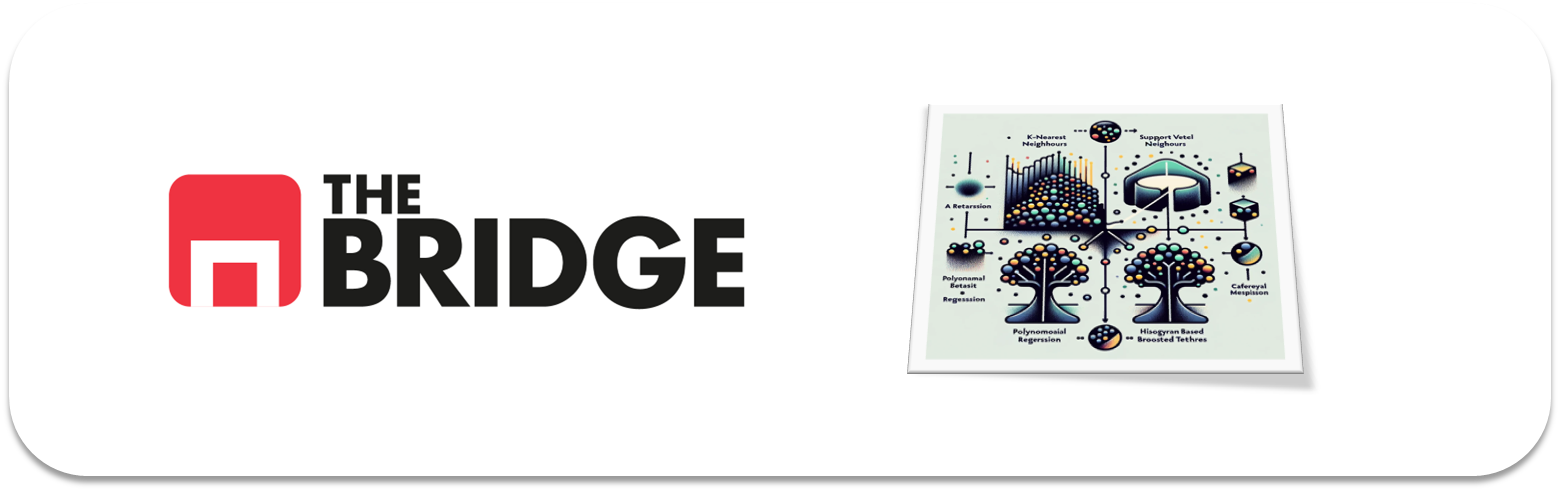

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import toolbox_ML
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import ConfusionMatrixDisplay, classification_report 
from catboost import CatBoostClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [303]:
df = pd.read_csv('./data/credit_npo.csv')

df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
5,0,0.101002,61,0,0.217115,15880.0,5,0,1,0,0.0
6,0,0.222830,60,0,0.907083,1312.0,5,0,0,0,0.0
7,0,0.353443,39,0,0.764309,4000.0,11,0,1,0,2.0
8,0,0.772455,45,0,0.387179,5100.0,5,0,1,0,3.0
9,0,0.116165,44,0,0.160236,10833.0,8,0,1,0,0.0


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [305]:
df.dropna(inplace=True)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Es un problema de clasificacion, en el que se clasifican los individuos dependiendo de si suponen un riesgo o no. La variable target es SeriousDlqin2yrs

In [307]:
valores_target = df['SeriousDlqin2yrs'].to_list()
print(set(valores_target))

{0, 1}


Como puede verse, solo toma valores de 0 o 1, siendo 0 que no representa un riesgo y 1 que si representa un riesgo

### #1.3
Pinta la distribución de frecuencias del target y coméntala

Text(0.5, 1.0, 'Distribution of Serious Delinquency in 2 Years')

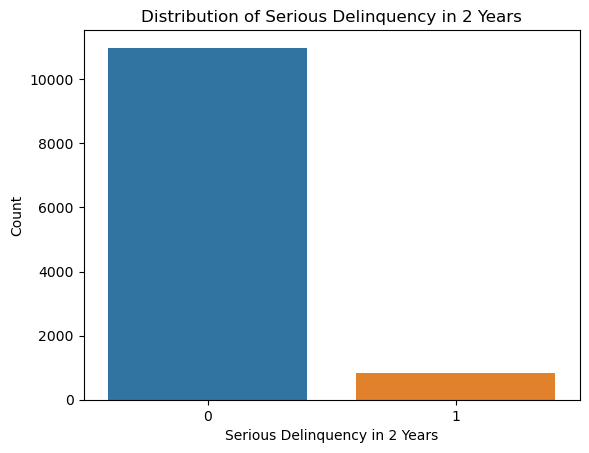

In [308]:
""" hist, edges = np.histogram(df.SeriousDlqin2yrs, 2)
plt.hist(df.SeriousDlqin2yrs, bins=edges)
plt.show() """
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.xlabel('Serious Delinquency in 2 Years')
plt.ylabel('Count')
plt.title('Distribution of Serious Delinquency in 2 Years')

<Axes: >

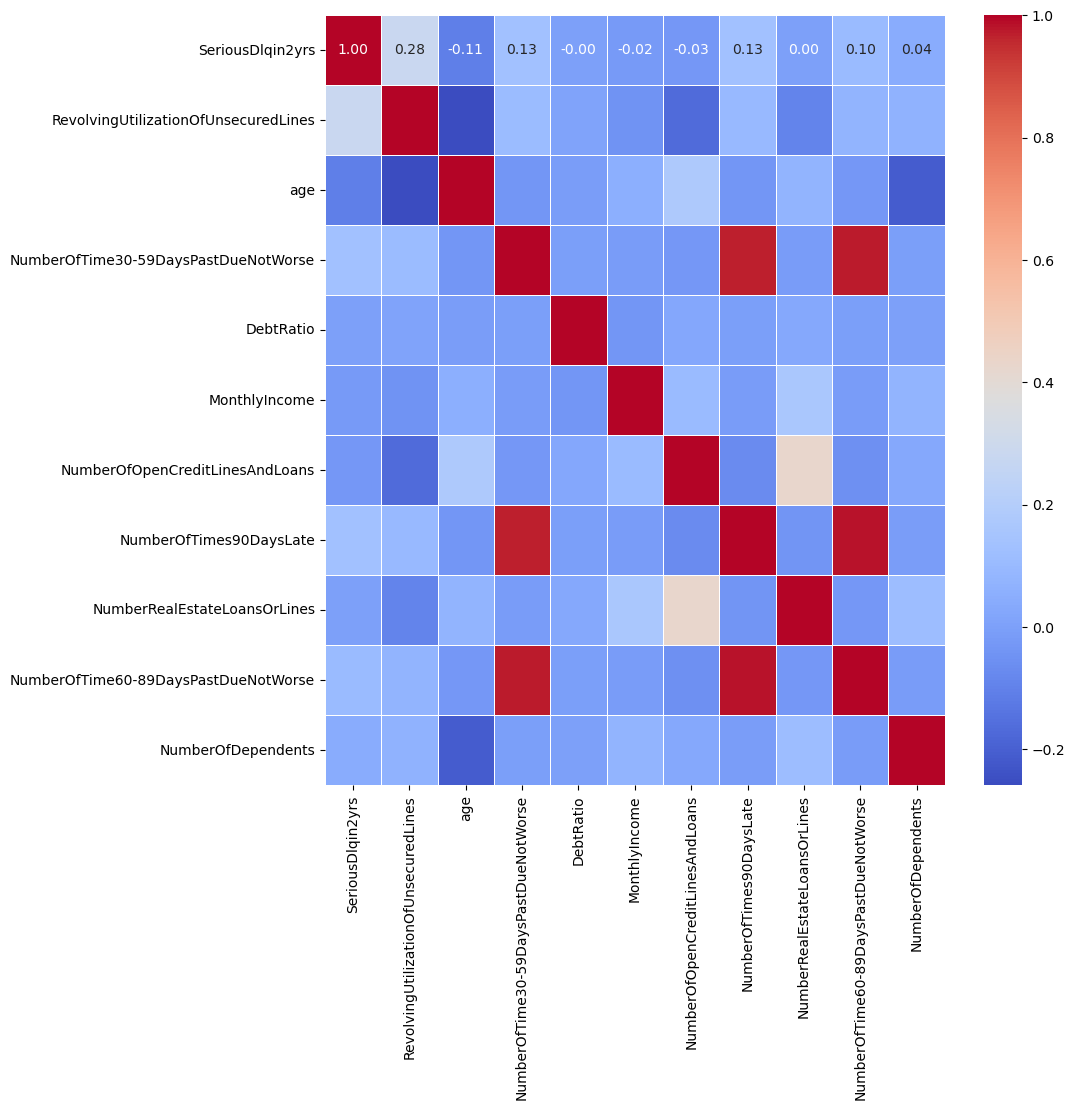

In [309]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=ax)

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [310]:
features = [
    "RevolvingUtilizationOfUnsecuredLines",
    "age",
    "NumberOfTime30-59DaysPastDueNotWorse",
    "DebtRatio",
    "MonthlyIncome",
    "NumberOfOpenCreditLinesAndLoans",
    "NumberOfTimes90DaysLate",
    "NumberRealEstateLoansOrLines",
    "NumberOfTime60-89DaysPastDueNotWorse",
    "NumberOfDependents"
]

target = 'SeriousDlqin2yrs'

In [311]:
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [312]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

In [313]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)  
y_pred = knn_model.predict(X_test)

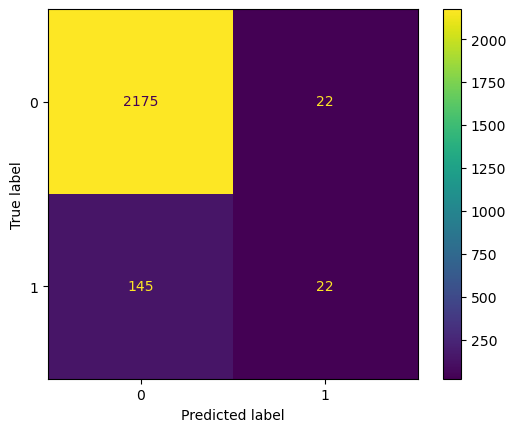

In [314]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [315]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2197
           1       0.50      0.13      0.21       167

    accuracy                           0.93      2364
   macro avg       0.72      0.56      0.59      2364
weighted avg       0.91      0.93      0.91      2364



In [316]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [317]:
y_train_smote.value_counts(True)

SeriousDlqin2yrs
0    0.5
1    0.5
Name: proportion, dtype: float64

In [318]:
knn_model_eq = KNeighborsClassifier(n_neighbors=3)
knn_model_eq.fit(X_train_smote, y_train_smote)  
y_pred_equilibrado = knn_model_eq.predict(X_test)

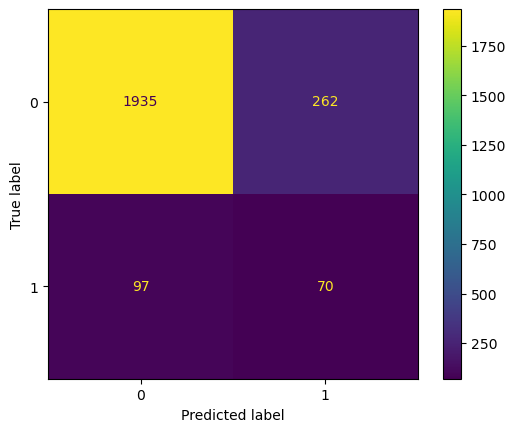

In [319]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_equilibrado);

In [320]:

print(classification_report(y_test, y_pred_equilibrado))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      2197
           1       0.21      0.42      0.28       167

    accuracy                           0.85      2364
   macro avg       0.58      0.65      0.60      2364
weighted avg       0.90      0.85      0.87      2364



In [321]:
for k in range(1, 10):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    print(f'Score for k={k}: {knn_regressor.score(X_test, y_test)}')

Score for k=1: -0.4497177697404464
Score for k=2: -0.10983949261240844
Score for k=3: -0.0022740136477159556
Score for k=4: 0.032313388698251955
Score for k=5: 0.056974698759058806
Score for k=6: 0.07235960486855131
Score for k=7: 0.07901829847962916
Score for k=8: 0.09523516689879219
Score for k=9: 0.08928292204343624


In [322]:
cat_mod = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

cat_mod.fit(X_train, y_train)  

y_pred_cat = cat_mod.predict(X_test)  

0:	learn: 0.6195971	total: 2.37ms	remaining: 234ms
1:	learn: 0.5604656	total: 3.88ms	remaining: 190ms
2:	learn: 0.5101727	total: 6.29ms	remaining: 203ms
3:	learn: 0.4673445	total: 7.96ms	remaining: 191ms
4:	learn: 0.4319064	total: 9.37ms	remaining: 178ms
5:	learn: 0.4006636	total: 11.2ms	remaining: 175ms
6:	learn: 0.3741999	total: 12.6ms	remaining: 168ms
7:	learn: 0.3519141	total: 14.2ms	remaining: 163ms
8:	learn: 0.3315851	total: 16.4ms	remaining: 166ms
9:	learn: 0.3138942	total: 18.4ms	remaining: 165ms
10:	learn: 0.2983208	total: 20.1ms	remaining: 162ms
11:	learn: 0.2847091	total: 21.6ms	remaining: 159ms
12:	learn: 0.2732019	total: 23.3ms	remaining: 156ms
13:	learn: 0.2630257	total: 24.7ms	remaining: 151ms
14:	learn: 0.2541055	total: 26ms	remaining: 147ms
15:	learn: 0.2456940	total: 27.2ms	remaining: 143ms
16:	learn: 0.2384673	total: 28.5ms	remaining: 139ms
17:	learn: 0.2323229	total: 29.8ms	remaining: 136ms
18:	learn: 0.2268401	total: 31.4ms	remaining: 134ms
19:	learn: 0.2218235	tot

In [323]:
print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2197
           1       0.63      0.16      0.25       167

    accuracy                           0.93      2364
   macro avg       0.79      0.57      0.61      2364
weighted avg       0.92      0.93      0.91      2364



In [324]:
ada_guide = AdaBoostClassifier(n_estimators=200, random_state=42)

ada_guide.fit(X_train, y_train)

y_pred_ada = ada_guide.predict(X_test)

In [325]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2197
           1       0.64      0.23      0.34       167

    accuracy                           0.94      2364
   macro avg       0.79      0.61      0.65      2364
weighted avg       0.92      0.94      0.92      2364



In [326]:
model_set = [knn_model_eq, knn_model,cat_mod, ada_guide]
model_names = ['knn eq',"knn",'cat', "ada guide"] 
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre != "Logistic Regression":
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 3, scoring = "accuracy")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train_smote, y_train, cv = 3, scoring = "accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)] 
print(ganador)

KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifier(n_neighbors=3)
0:	learn: 0.6200583	total: 1.94ms	remaining: 192ms
1:	learn: 0.5612916	total: 3.35ms	remaining: 164ms
2:	learn: 0.5116071	total: 4.77ms	remaining: 154ms
3:	learn: 0.4699373	total: 6.38ms	remaining: 153ms
4:	learn: 0.4343391	total: 8.13ms	remaining: 154ms
5:	learn: 0.4029052	total: 9.74ms	remaining: 153ms
6:	learn: 0.3762394	total: 11.1ms	remaining: 148ms
7:	learn: 0.3539096	total: 12.4ms	remaining: 143ms
8:	learn: 0.3343203	total: 13.4ms	remaining: 135ms
9:	learn: 0.3165087	total: 14.7ms	remaining: 133ms
10:	learn: 0.3010645	total: 16ms	remaining: 130ms
11:	learn: 0.2872514	total: 17.4ms	remaining: 128ms
12:	learn: 0.2757029	total: 18.7ms	remaining: 125ms
13:	learn: 0.2653467	total: 20ms	remaining: 123ms
14:	learn: 0.2565959	total: 21.3ms	remaining: 121ms
15:	learn: 0.2481877	total: 22.8ms	remaining: 120ms
16:	learn: 0.2408130	total: 24.1ms	remaining: 118ms
17:	learn: 0.2351766	total: 25.7ms	remaining: 117ms
18:	le

Gana el modelo cat

In [328]:
params_grid = {
    "iterations": [50, 100, 150], 
    "learning_rate": [0.01, 0.05, 0.1],
    "depth": [4, 5, 6],
    "l2_leaf_reg": [1, 3, 5],
    "border_count": [32, 50, 100],
    "bagging_temperature": [0.5, 1, 2],
    "scale_pos_weight": [1, 2, 3]
}

catboost_model = CatBoostClassifier()

cat_grid = GridSearchCV(estimator=catboost_model,
                                param_grid=params_grid,
                                cv=3,
                                scoring="accuracy",
                                n_jobs=-1,
                                verbose=2)

cat_grid.fit(X_train, y_train)

Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
0:	learn: 0.6190009	total: 2.88ms	remaining: 429ms
1:	learn: 0.5589265	total: 4ms	remaining: 296ms
2:	learn: 0.5092543	total: 5.01ms	remaining: 246ms
3:	learn: 0.4661777	total: 6.05ms	remaining: 221ms
4:	learn: 0.4299970	total: 7.07ms	remaining: 205ms
5:	learn: 0.3997231	total: 8ms	remaining: 192ms
6:	learn: 0.3725517	total: 8.96ms	remaining: 183ms
7:	learn: 0.3500662	total: 10.1ms	remaining: 179ms
8:	learn: 0.3296521	total: 11.1ms	remaining: 175ms
9:	learn: 0.3120049	total: 12.1ms	remaining: 170ms
10:	learn: 0.2967218	total: 13.1ms	remaining: 166ms
11:	learn: 0.2834793	total: 14.2ms	remaining: 163ms
12:	learn: 0.2723047	total: 15.2ms	remaining: 160ms
13:	learn: 0.2620235	total: 16.3ms	remaining: 158ms
14:	learn: 0.2531683	total: 17.8ms	remaining: 160ms
15:	learn: 0.2451731	total: 19.2ms	remaining: 160ms
16:	learn: 0.2379031	total: 20.5ms	remaining: 160ms
17:	learn: 0.2315352	total: 21.5ms	remaining: 158ms
18:	learn: 0.22

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001E43E31D750>,
             n_jobs=-1,
             param_grid={'bagging_temperature': [0.5, 1, 2],
                         'border_count': [32, 50, 100], 'depth': [4, 5, 6],
                         'iterations': [50, 100, 150], 'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'scale_pos_weight': [1, 2, 3]},
             scoring='accuracy', verbose=2)

In [329]:
print("Mejores hiperparámetros encontrados:")
print(cat_grid.best_params_)

Mejores hiperparámetros encontrados:
{'bagging_temperature': 0.5, 'border_count': 50, 'depth': 5, 'iterations': 150, 'l2_leaf_reg': 1, 'learning_rate': 0.1, 'scale_pos_weight': 1}


In [330]:
print("Mejor score obtenido:")
print(cat_grid.best_score_)

Mejor score obtenido:
0.9367328084306821


In [332]:
cat_best = CatBoostClassifier(bagging_temperature= 0.5, border_count=50, depth=5, iterations=150, l2_leaf_reg=1, learning_rate=0.1, scale_pos_weight=1)

In [333]:
cat_best.fit(X_train, y_train)

0:	learn: 0.6190009	total: 1.14ms	remaining: 169ms
1:	learn: 0.5589265	total: 3.21ms	remaining: 237ms
2:	learn: 0.5092543	total: 4.16ms	remaining: 204ms
3:	learn: 0.4661777	total: 5.08ms	remaining: 186ms
4:	learn: 0.4299970	total: 6.07ms	remaining: 176ms
5:	learn: 0.3997231	total: 7.02ms	remaining: 169ms
6:	learn: 0.3725517	total: 7.98ms	remaining: 163ms
7:	learn: 0.3500662	total: 8.89ms	remaining: 158ms
8:	learn: 0.3296521	total: 9.86ms	remaining: 154ms
9:	learn: 0.3120049	total: 10.7ms	remaining: 150ms
10:	learn: 0.2967218	total: 11.7ms	remaining: 147ms
11:	learn: 0.2834793	total: 12.8ms	remaining: 147ms
12:	learn: 0.2723047	total: 13.8ms	remaining: 145ms
13:	learn: 0.2620235	total: 14.7ms	remaining: 143ms
14:	learn: 0.2531683	total: 15.8ms	remaining: 142ms
15:	learn: 0.2451731	total: 16.9ms	remaining: 142ms
16:	learn: 0.2379031	total: 18ms	remaining: 141ms
17:	learn: 0.2315352	total: 18.9ms	remaining: 139ms
18:	learn: 0.2268675	total: 19.8ms	remaining: 137ms
19:	learn: 0.2219355	tot

In [334]:
print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2197
           1       0.63      0.16      0.25       167

    accuracy                           0.93      2364
   macro avg       0.79      0.57      0.61      2364
weighted avg       0.92      0.93      0.91      2364



In [335]:
y_pred_best = cat_best.predict(X_test)  

In [336]:
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2197
           1       0.60      0.17      0.26       167

    accuracy                           0.93      2364
   macro avg       0.77      0.58      0.61      2364
weighted avg       0.92      0.93      0.92      2364

